# Interpreting Linear Regression

In this notebook we will continue with our car price prediction example and explore the methods we use to interpret and evaluate the results of our linear regression model. We will begin by reproducing the results from the previous notebook.

As usual, we first import the required packages and dataset.

In [3]:
import pandas as pd
import matplotlib.pyplot as plot
import statsmodels.api as stats
import numpy as np

In [2]:
carprice_df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
carprice_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


We then remove the independent variables with too many unique categories or have high correlations with other independent variables.

In [5]:
carprice_df = carprice_df.drop(columns = ['car_ID', 'CarName', 'carlength', 'carwidth', 'highwaympg'])

In [6]:
carprice_df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,curbweight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,48.8,2548,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,48.8,2548,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,52.4,2823,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,54.3,2337,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,54.3,2824,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,55.5,2952,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,55.5,3049,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,55.5,3012,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,55.5,3217,...,six,145,idi,3.01,3.40,23.0,106,4800,26,22470.0


Next we one-hot-encode the categorical variables so each category in a categorical variable becomes its own binary column - this converts categorical variables to numeric. We also remove more highly correlated variables after including the one-hot-encoded variables.

In [7]:
dummy = pd.get_dummies(carprice_df.select_dtypes(include = 'object'), drop_first = True)

In [10]:
carprice_df = pd.concat([carprice_df.select_dtypes(exclude='object'), dummy], axis=1)

In [11]:
carprice_df = carprice_df.drop(columns=['compressionratio', 'drivewheel_fwd', 'enginetype_rotor', 'fuelsystem_4bbl', 'fuelsystem_idi'])

We then split our data into train and test sets, and add our constant column.

In [12]:
train_df=carprice_df.sample(frac=0.7, random_state=101) 
test_df=carprice_df.drop(train_df.index)

In [13]:
Y_train = train_df['price']
X_train = stats.add_constant(train_df.drop(columns = ['price']))

We then fit our model to the training data

In [17]:
model_carprice = stats.OLS(Y_train, X_train.astype(float))
results_carprice = model_carprice.fit()

In [21]:
Y_test = test_df['price']
test_df = stats.add_constant(test_df)
X_test = test_df[X_train.columns]

We finally produce our test set predictions



In [22]:
test_predictions = results_carprice.predict(X_test)

# p-Values and Coefficients

### p-Values

In [23]:
print(results_carprice.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     45.55
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           3.67e-50
Time:                        18:59:45   Log-Likelihood:                -1290.5
No. Observations:                 144   AIC:                             2651.
Df Residuals:                     109   BIC:                             2755.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4589.81

### Re-training the Model

In [24]:
Y_train_new = train_df.price
# Only selecting significant variables
X_train_new = stats.add_constant(train_df[['enginesize', 
                                    'stroke', 
                                    'peakrpm', 
                                    'fueltype_gas', 
                                    'carbody_hardtop', 
                                    'carbody_hatchback', 
                                    'enginelocation_rear',
                                    'enginetype_ohc',
                                    'cylindernumber_five',
                                    'cylindernumber_four',
                                    'cylindernumber_six']])

In [26]:
model_carprice_new = stats.OLS(Y_train_new, X_train_new.astype(float))
results_carprice_new = model_carprice_new.fit()

In [27]:
print(results_carprice_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     90.22
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           8.02e-56
Time:                        19:02:56   Log-Likelihood:                -1332.3
No. Observations:                 144   AIC:                             2689.
Df Residuals:                     132   BIC:                             2724.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5265.5852   3

All of our independent variables now have p-values below 0.05 (except const which we are not concerned whether this is zero or not) and we have reduced the complexity of our model by reducing the number of variables.

In [29]:
Y_test_new = test_df['price']
X_test_new = test_df[X_train_new.columns]

In [30]:
test_predictions_new = results_carprice_new.predict(X_test_new)

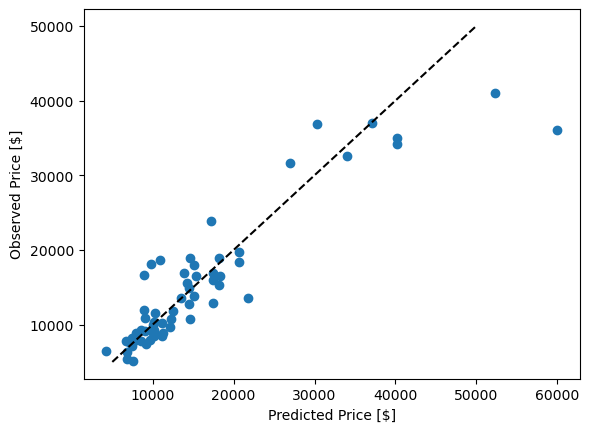

In [31]:
plot.scatter(test_predictions_new, Y_test_new)
plot.plot([5000, 50000], [5000, 50000], c='k', ls='--')
plot.xlabel('Predicted Price [$]')
plot.ylabel('Observed Price [$]')
plot.show()

### Coefficients

The coefficients tell us how much the target variable changes for a one unit change in the corresponding independent variable when all the other independent variables are held fixed. We can get a measure of which independent variable contributes the most change to the target variable if we first scale all the independent variables to remove the units. This is known as standardization as we discussed in the theory lesson.

In [32]:
X_train_scale = ((X_train_new - X_train_new.mean())/X_train_new.std()).drop(columns=['const'])

In [33]:
X_train_scale.std()

enginesize             1.0
stroke                 1.0
peakrpm                1.0
fueltype_gas           1.0
carbody_hardtop        1.0
carbody_hatchback      1.0
enginelocation_rear    1.0
enginetype_ohc         1.0
cylindernumber_five    1.0
cylindernumber_four    1.0
cylindernumber_six     1.0
dtype: float64

In [34]:
X_train_scale.mean().round(2)

enginesize             0.0
stroke                 0.0
peakrpm                0.0
fueltype_gas          -0.0
carbody_hardtop        0.0
carbody_hatchback      0.0
enginelocation_rear    0.0
enginetype_ohc         0.0
cylindernumber_five   -0.0
cylindernumber_four    0.0
cylindernumber_six     0.0
dtype: float64

As we can see the independent variables now all have mean zero and a standard deviation of one and will will therefore be able to compare coefficient values. We will now refit the model. Scikit-Learn also contains a function StandardScaler() which will perform this standardization.

In [35]:
X_train_scale = stats.add_constant(X_train_scale)

In [36]:
model_carprice_scale = stats.OLS(Y_train_new, X_train_scale)
results_carprice_scale = model_carprice_scale.fit()

In [37]:
print(results_carprice_scale.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     90.22
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           8.02e-56
Time:                        19:07:41   Log-Likelihood:                -1332.3
No. Observations:                 144   AIC:                             2689.
Df Residuals:                     132   BIC:                             2724.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.248e+04    

<Axes: >

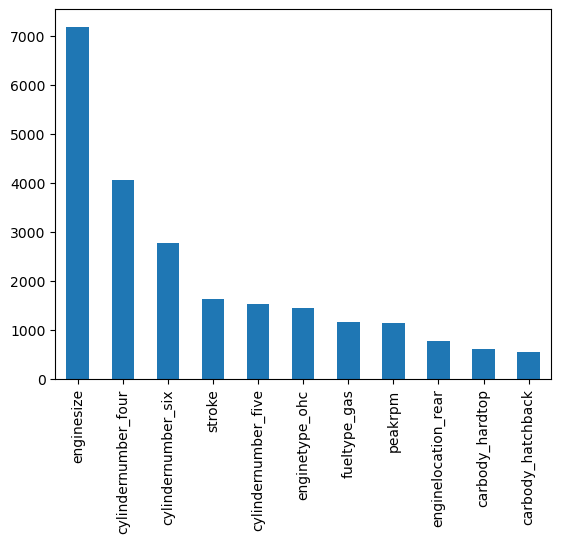

In [38]:
results_carprice_scale.params.drop(index=['const']).abs().sort_values(ascending=False).plot.bar()

# Residuals and Residual Plots

In [39]:
results_carprice_new.resid

120    -185.205528
185   -1485.475419
180   -3815.947168
119     872.815707
109    3492.490264
          ...     
86    -3061.198405
193    2037.957826
20    -1383.557493
155    1392.163478
10     2523.359750
Length: 144, dtype: float64

We can then plot these residuals against our predicted values for the training data and observe if we see any non-random pattern in the data.

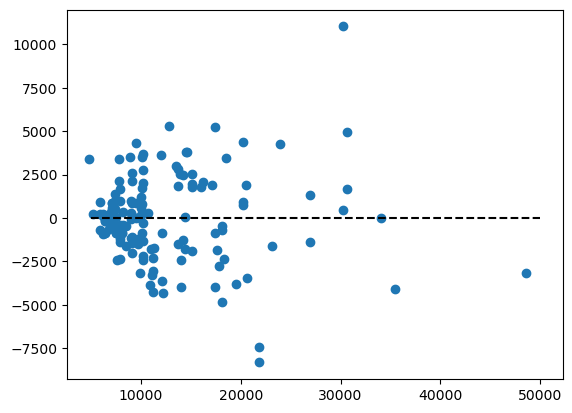

In [41]:
plot.scatter(results_carprice_new.fittedvalues, results_carprice_new.resid)
plot.plot([5000,50000], [0,0], c='k', ls='--');

# Evaluating Linear Regression

statsmodels allows us to easily calculate the metrics we have discussed (mean square error, root mean square error, mean absolute error,  R2  and adjusted  R2 ) We can calculate these for either/both the training data and the test data.

In [47]:
train_mse = stats.tools.eval_measures.mse(Y_train_new, results_carprice_new.fittedvalues)
print('The training dataset mean square error is {}'.format(train_mse.round(1)))

The training dataset mean square error is 6361335.8


In [48]:
train_rmse = stats.tools.eval_measures.rmse(Y_train_new, results_carprice_new.fittedvalues)
print('The training dataset root mean square error is {}'.format(train_rmse.round(1)))

The training dataset root mean square error is 2522.2


In [49]:
train_mae = stats.tools.eval_measures.meanabs(Y_train_new, results_carprice_new.fittedvalues)
print('The training dataset mean absolute error is {}'.format(train_mae.round(1)))

The training dataset mean absolute error is 1851.4


In [50]:
train_r2 = results_carprice_new.rsquared
print('The training dataset coefficient of determination is {}'.format(train_r2.round(3)))

The training dataset coefficient of determination is 0.883


In [51]:
train_r2_adj = results_carprice_new.rsquared_adj
print('The training dataset adjusted coefficient of determination is {}'.format(train_r2_adj.round(3)))

The training dataset adjusted coefficient of determination is 0.873


### Scikit-Learn

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [53]:
Y = carprice_df.price
X = carprice_df[['enginesize', 
                 'stroke', 
                 'peakrpm', 
                 'fueltype_gas', 
                 'carbody_hardtop', 
                 'carbody_hatchback', 
                 'enginelocation_rear',
                 'enginetype_ohc',
                 'cylindernumber_five',
                 'cylindernumber_four',
                 'cylindernumber_six']]

In [54]:
sk_X_train, sk_X_test, sk_Y_train, sk_Y_test = train_test_split(X, Y, test_size=0.3, random_state=97)

In [55]:
regressor = LinearRegression()  
regressor.fit(sk_X_train, sk_Y_train)

LinearRegression()

In [56]:
sk_intercept_carprice = regressor.intercept_
sk_engsize_coeffs = regressor.coef_
sk_ssr_carprice = np.sum((sk_Y_train-regressor.predict(sk_X_train))**2)

In [57]:
sk_train_predictions = regressor.predict(sk_X_train)
sk_test_predictions = regressor.predict(sk_X_test)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
sk_train_mse = mean_squared_error(sk_Y_train, sk_train_predictions)
print('The training dataset mean square error is {}'.format(sk_train_mse.round(1)))

The training dataset mean square error is 6501288.6


In [60]:
sk_train_rmse = np.sqrt(sk_train_mse)
print('The training dataset root mean square error is {}'.format(sk_train_rmse.round(1)))

The training dataset root mean square error is 2549.8


In [61]:
sk_train_mae = mean_absolute_error(sk_Y_train, sk_train_predictions)
print('The training dataset mean absolute error is {}'.format(sk_train_mae.round(1)))

The training dataset mean absolute error is 1904.1


In [62]:
sk_train_r2 = r2_score(sk_Y_train, sk_train_predictions)
print('The training dataset coefficient of determination is {}'.format(sk_train_r2.round(3)))

The training dataset coefficient of determination is 0.872


In [63]:
n = sk_X_train.shape[0]
p = sk_X_train.shape[1]
sk_train_r2_adj = 1-(1-sk_train_r2)*(n-1)/(n-p-1)
print('The training dataset adjusted coefficient of determination is {}'.format(sk_train_r2_adj.round(3)))

The training dataset adjusted coefficient of determination is 0.861


### Test Data

In [64]:
sk_test_r2 = r2_score(sk_Y_test, sk_test_predictions)
print('The test dataset coefficient of determination is {}'.format(sk_test_r2.round(3)))

The test dataset coefficient of determination is 0.837
